# DSCI 100 Group Project Final Report
## Introduction:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report - **already done**
- clearly state the question you tried to answer with your project - **already done**
- identify and fully describe the dataset that was used to answer the question - **already done**

### Summary of Data Description
- TODO

## Methods & Results:
- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
    - 1. loads data  - **already done**
    - 2. wrangles and cleans the data to the format necessary for the planned analysis - **already done**
    - 3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis - **already done**
    - 4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis - **already done**
    - **5. performs the data analysis** - done
    - **6. creates a visualization of the analysis** - done
    - **note:** all figures should have a figure number and a legend

### **Introduction**

The Pacific Laboratory for Artificial Intelligence (PLAI) set up a MineCraft server where they observed player gameplay, creating a dataset consisting of two files: players.csv and sessions.csv.

Using this dataset, we want to explore which "kinds" of players are most likely to contribute a large amount of data. More specifically, we want to see if a **player's subscription status, age, gender, and experience can predict their playtime.**

In [ ]:
# Load libraries needed
library(tidyverse)
library(repr)
library(tidymodels)

# Load dataset
players <- read_csv("https://raw.githubusercontent.com/nesteagle/DSCI100-Project/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/nesteagle/DSCI100-Project/refs/heads/main/data/sessions.csv")

# Rename columns for consistency
players <- players |>
    rename(age = Age, hashed_email = hashedEmail) |>
    drop_na()
sessions <- sessions |>
    rename(hashed_email = hashedEmail) |>
    drop_na()

In [ ]:
summary(players)
summary(sessions)

nrow(players)
nrow(sessions)
ncol(players)
ncol(sessions)

players |> distinct(experience, gender)

### **Data Description**

#### **players.csv**
- A list that contains the information of all the players. 
- Number of variables (columns): **7**
- Number of observations (rows): **196**

#### Player Variables
**experience:** 
- A categorical variable of type character: "Beginner", "Amateur", "Regular", "Veteran", "Pro".
- Refers to the player's surveyed/self-declared experience with Minecraft.
- Collected by survey.

**subscribe:** 
- A categorical variable of type logical (``true`` or ``false``)
- Refers to whether player is subscribed to a game-related newsletter or not.
- 144 TRUE and 52 FALSE
- Collected by survey.

**hashedEmail:** 
- A categorical variable of type character representing the player's hashed email.
- Presumably collected by signup.
  
**played_hours:** A quantitative variable of type double representing the amount of hours they played on the server, collected by playtime logs.
    - Summary statitistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 0.00|0.00|0.10|5.85|0.60|223.10|0|

**name:** 
- A categorical variable of type character representing the player's name
- Collected by survey

**gender:** 
- A categorical variable of type character representing the player's self-identified gender:  "Male", "Female", "Non-binary", "Two-Spirited", "Agender", "Prefers not to say", "Other
- Collected by survey


**age:** 
- A quantitative variable of type double representing the player's age
- Collected by survey.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 9.00|17.00|19.00|21.14|22.75|58.00|2|



#### **sessions.csv**
- A list of individual play sessions by each player
- Number of variables (columns): **5**
- Number of observations (rows): **1535**

#### Sessions Variables
**hashedEmail** 
- A categorical variable of type character
- Represents the session's players' email
- Presumably collected by signup.

**start_time** 
- A categorical/ordinal variable of type character
- Represents the player's session start time (dd/mm/yyy, 24 hour time)
- Collected by server logs

**end_time** 
- A categorical/ordinal variable of type character
- Represents the player's session end time (dd/mm/yyy, 24 hour time)
- Collected by server logs

**original_start_time:** 
- A quantitative variable of type double
- Represents the session's start time recorded in UNIX time (ms since Jan 1, 1970 at 00:00:00 UTC)
- Collected by server logs.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.73e+12|0|

**original_end_time:** 
- A quantitative variable of type double
- Represents the session's end time recorded in UNIX time (ms since Jan 1, 1970 at 00:00:00 UTC)
- Collected by server logs.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
|1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|2|


### **Potential Issues in Data**

- Low player count (196) might not be enough to generate meaningful conclusions
- A few NA variables in age and subscribe and original_end_time
- Summary statistics for original_start_time and original_end_time are not too specific as they are rounded to 2 decimal places.


## Exploratory Data Visualization
Here, we load in the libraries for better visualization and perform a log(x+1) transform on our players set, purely for visualization. This shift is accounted for through use of custom labels and allows for values of 0 to be plotted (otherwise log(0) is undefined).

In [3]:
# load in color library and set plot width/height
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 8)
# log(x+1) transform
players_shifted <- players |> 
    mutate(played_hours = played_hours + 1)

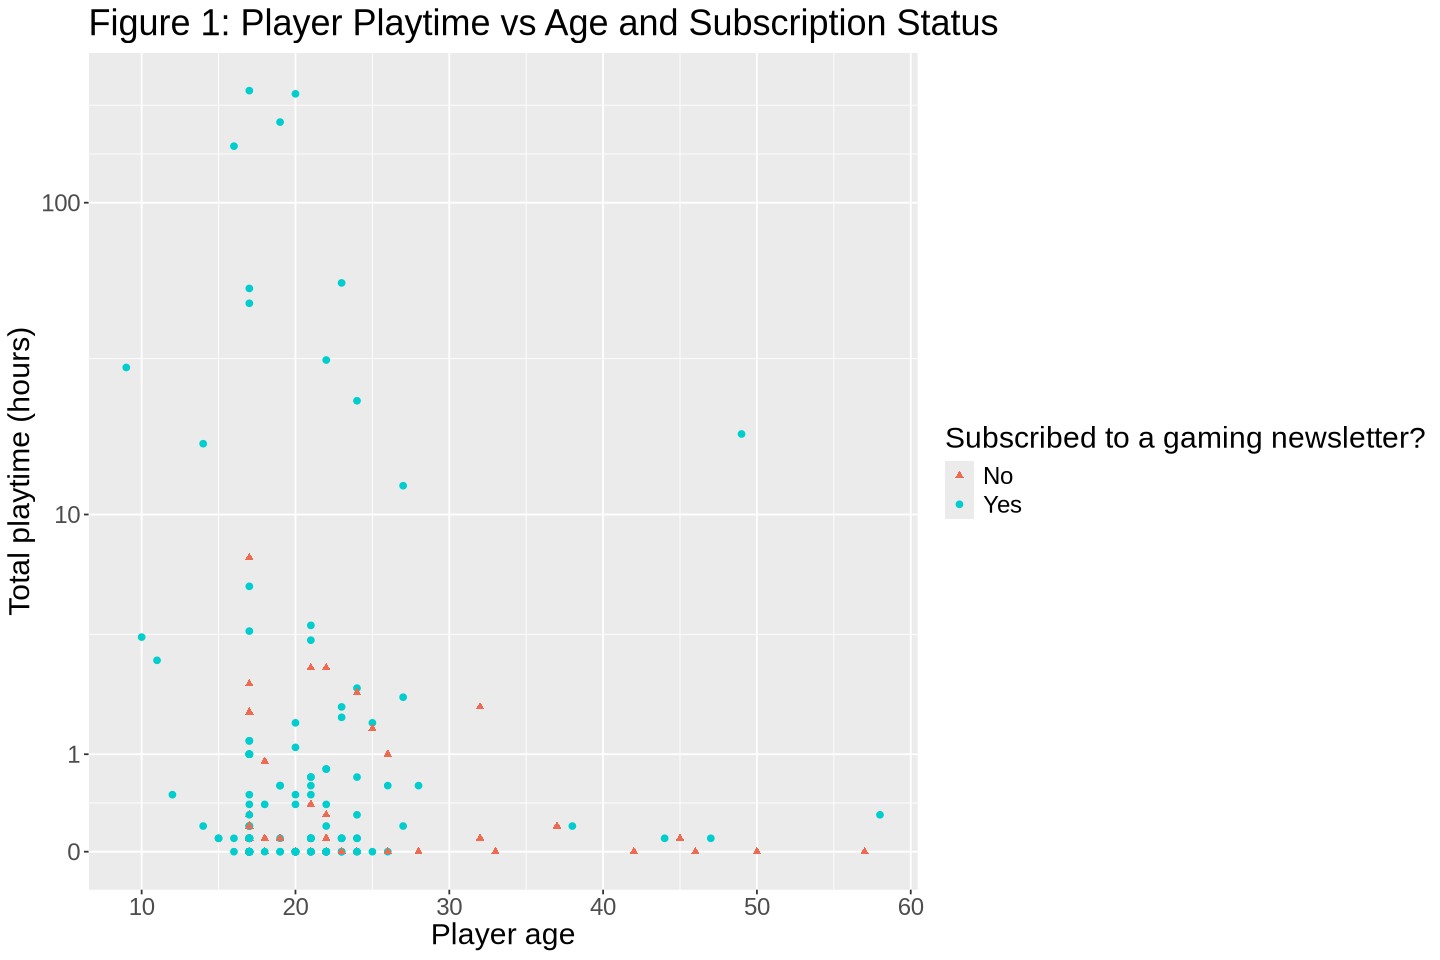

In [4]:
ggplot(players_shifted, aes(x=age, y=played_hours, colour = subscribe, shape = subscribe)) +
    geom_point() +
    labs(x="Player age", y="Total playtime (hours)", colour = "Subscribed to a gaming newsletter?", shape = "Subscribed to a gaming newsletter?", title="Figure 1: Player Playtime vs Age and Subscription Status")+
    scale_color_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    scale_shape_manual(labels=c("No","Yes"), values=c("triangle", "circle"))+
    scale_y_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))+
    theme(text = element_text(size=18))

This is a log-transformed scatterplot of player age against playtime. We can see that players below 30 make up most of the sample, tend to have high variability and can play a lot. We also see that subscribed players have a way higher chance of playing more than players who aren't.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


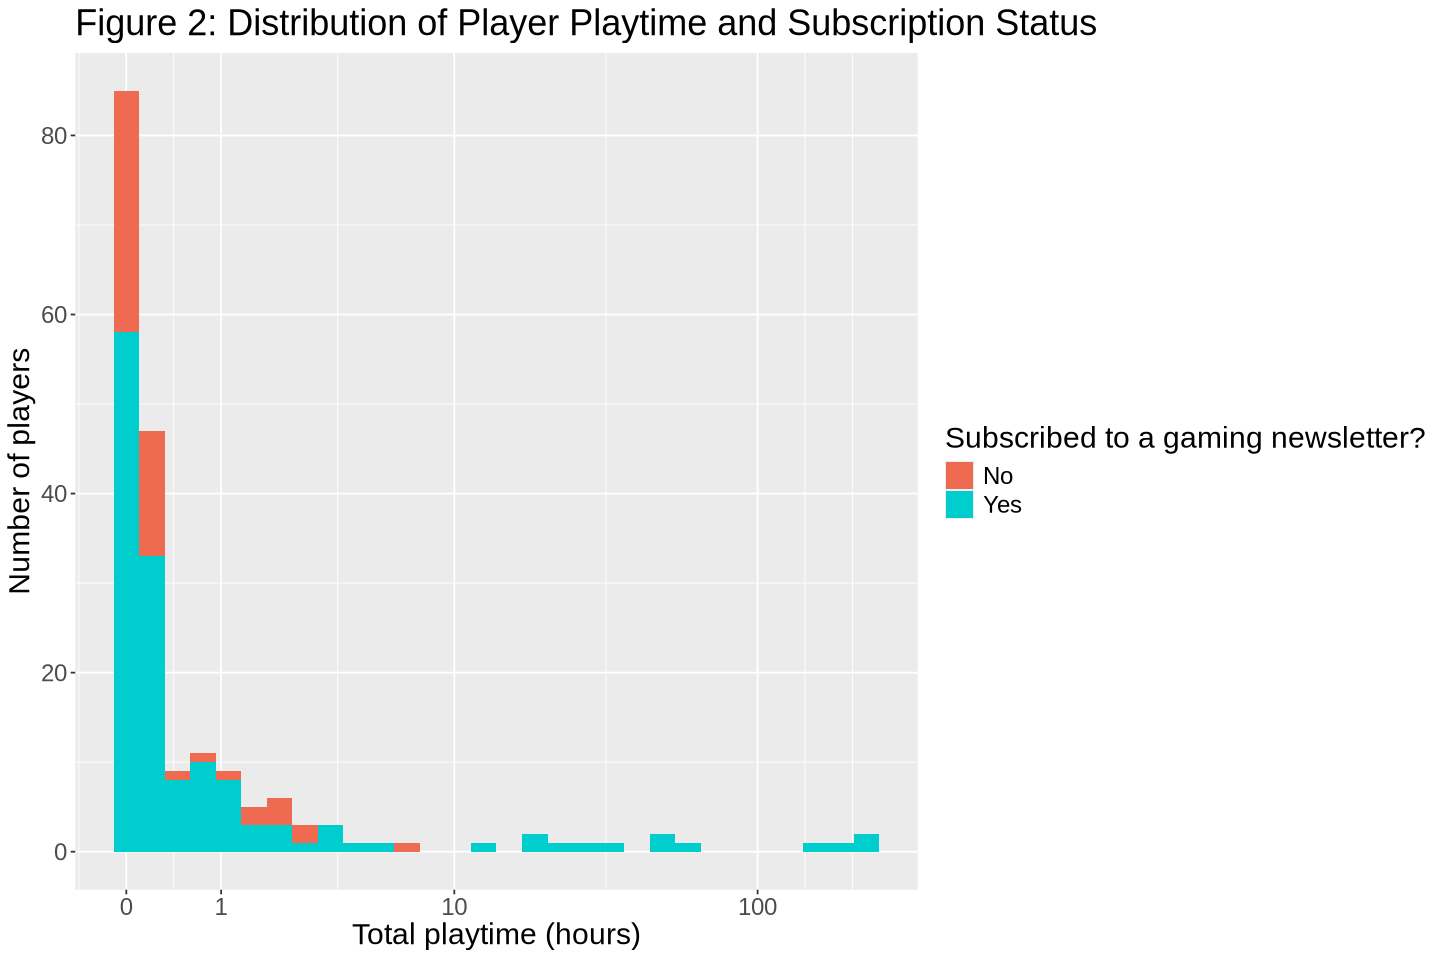

In [5]:
ggplot(players_shifted, aes(x=played_hours, fill = subscribe)) +
    geom_histogram() +
    labs(x="Total playtime (hours)", y="Number of players", fill = "Subscribed to a gaming newsletter?", title="Figure 2: Distribution of Player Playtime and Subscription Status")+
    scale_fill_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    theme(text = element_text(size=18))+
    scale_x_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))

This is a log-transformed histogram of player playtime, with the color representing their subscription status. It is right skewed and from this we can see that most players do not play at all, and contribute very little, but a small minority play a lot.

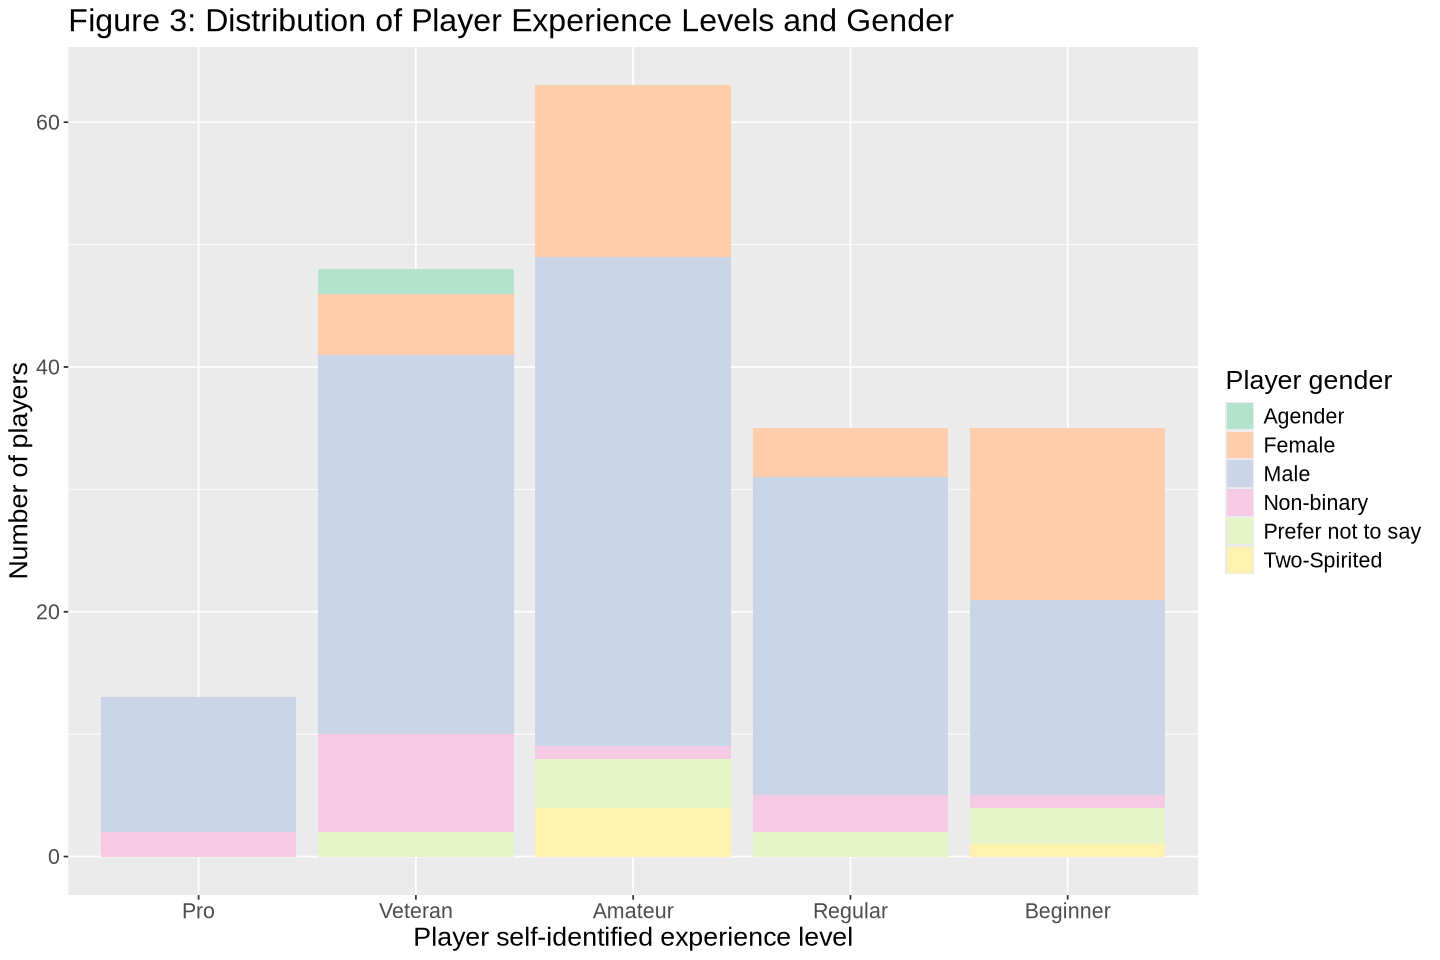

In [6]:
ggplot(players, aes(x=as_factor(experience), fill = gender)) +
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Player self-identified experience level", y="Number of players", title="Figure 3: Distribution of Player Experience Levels and Gender", fill = "Player gender")+
    scale_fill_brewer(palette = 'Pastel2')

This barplot visualizes the distribution of players' self-identified experience levels and gender. We can see that the majority of players are male and female, and that it's most common for players to identify as amateur.

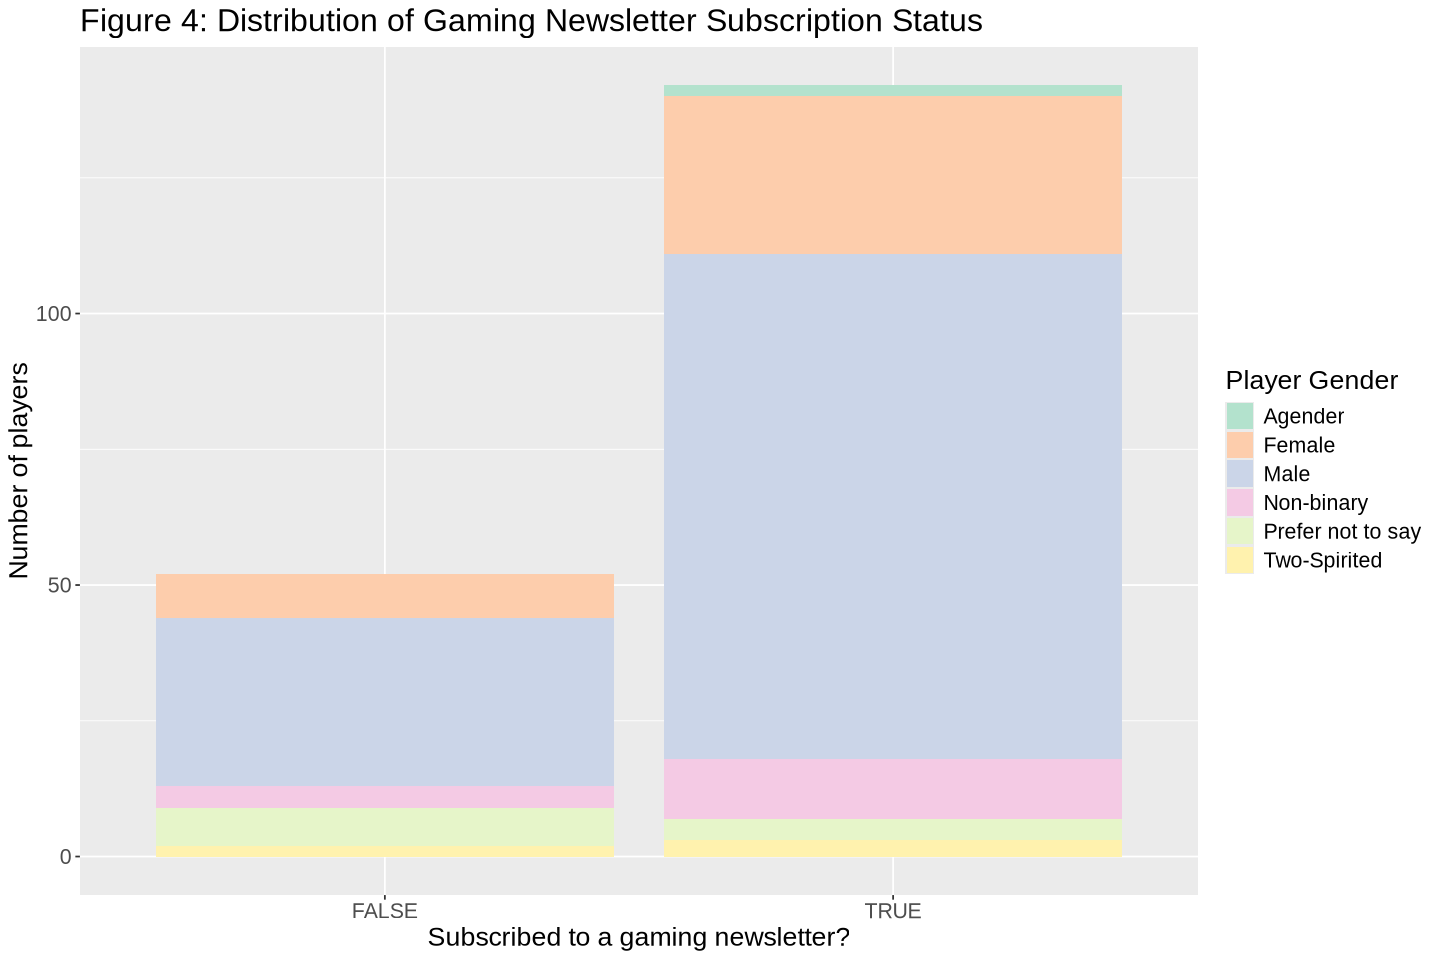

In [7]:
ggplot(players, aes(x=subscribe, fill=gender)) + 
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Subscribed to a gaming newsletter?", y="Number of players", title="Figure 4: Distribution of Gaming Newsletter Subscription Status", fill = "Player Gender")+
    scale_fill_brewer(palette = 'Pastel2')

These barplots compare the gender distributions of subscription status to a gaming newsletter. From this, we see that the majority of players are subscribed to a gaming newsletter.

In [8]:
# set seed for reproducibility
set.seed(2026)

# turn subscribe logical into factor
players_factor <- mutate(players, subscribe = as_factor(subscribe))

# split into testing, training sets
players_split <- initial_split(players_factor, prop = 0.7, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

# create k-nn recipe with played_hours strata against predictors
players_recipe <- recipe(played_hours ~ subscribe+age+gender+experience, data = players_train) |>
    step_scale(age) |>
    step_center(age)

# create k-nn regression model with neighbor tuning
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

# 5-fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

# create workflow using our model and recipe; fit to player data
players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(players_train)

# create k values from 1-50 for comparison
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

# collect metrics on predictions using each k
players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

# players_results

Warning message:
“tune samples were requested but there were 134 rows in the data. 129 will be used.”
→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





Now that we've collected metrics on our model, we can find the minimum RMSPE:

In [9]:
rmse_min <- players_results |>
    slice_min(std_err, n=1)
rmse_min 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,31.95368,4,7.764819,Preprocessor1_Model19


And below, we plot our RMSPE values per k from 1-50.

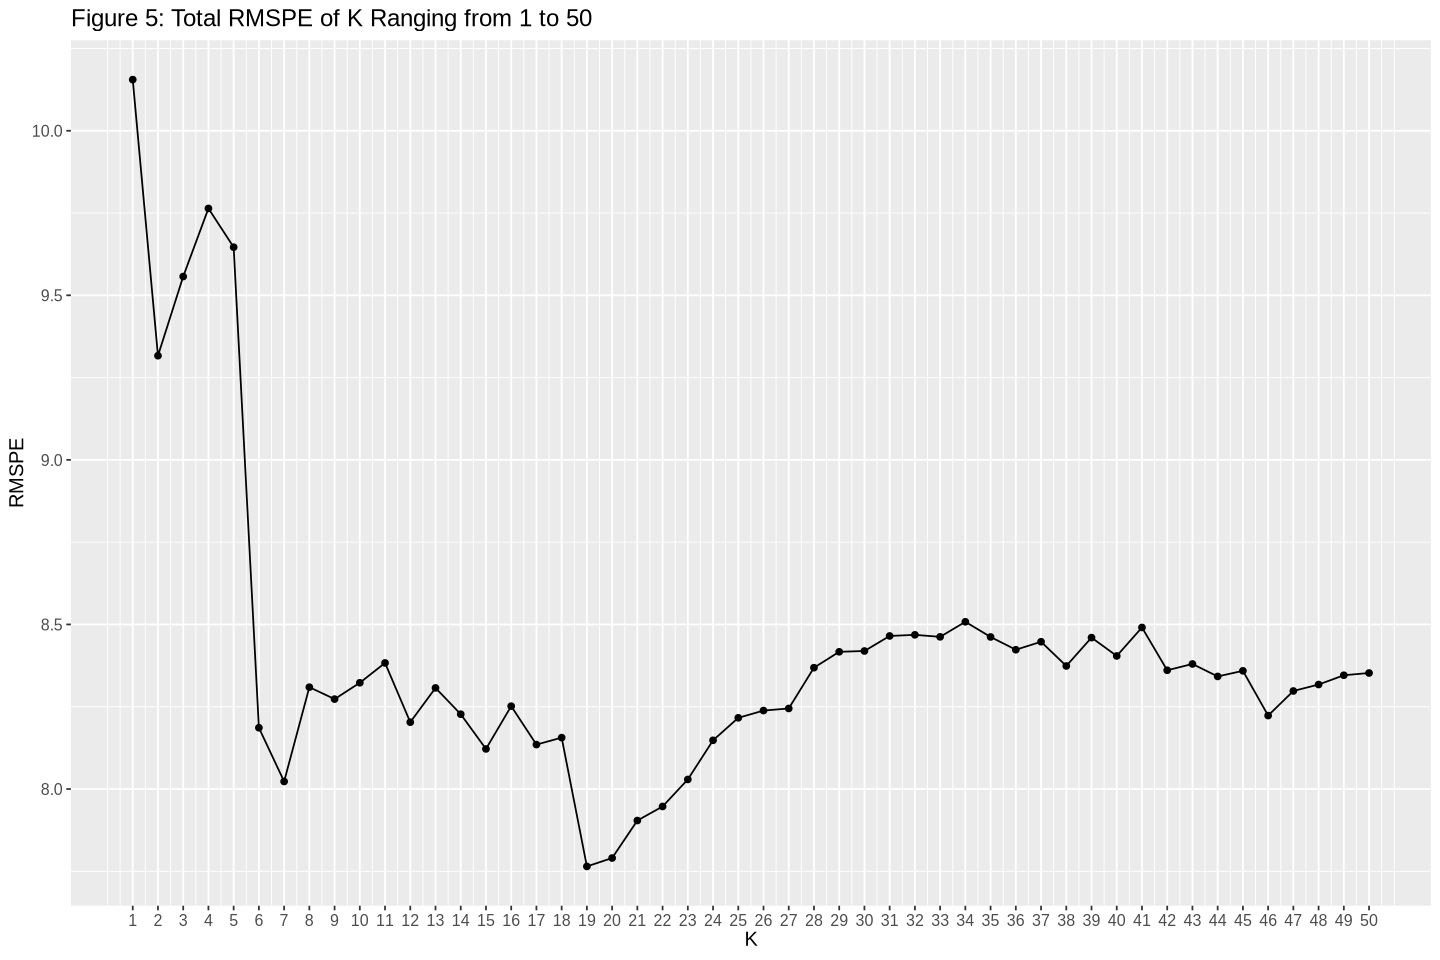

In [10]:
rmse_plot <- players_results |>
    ggplot(aes(x = neighbors, y = std_err)) +
    geom_point() +
    geom_line () +
    labs(x = "K", y = "RMSPE", title = "Figure 5: Total RMSPE of K Ranging from 1 to 50") +
    scale_x_continuous(breaks = 1:50) +
    theme(text = element_text(size = 12))

rmse_plot

From the plot above, we find that the K value with the lowest RMSPE is $K=19$. Below, we specify a new model using 19 neighbors, predict on training data using it, and show the regression line plot below. **TODO** check 

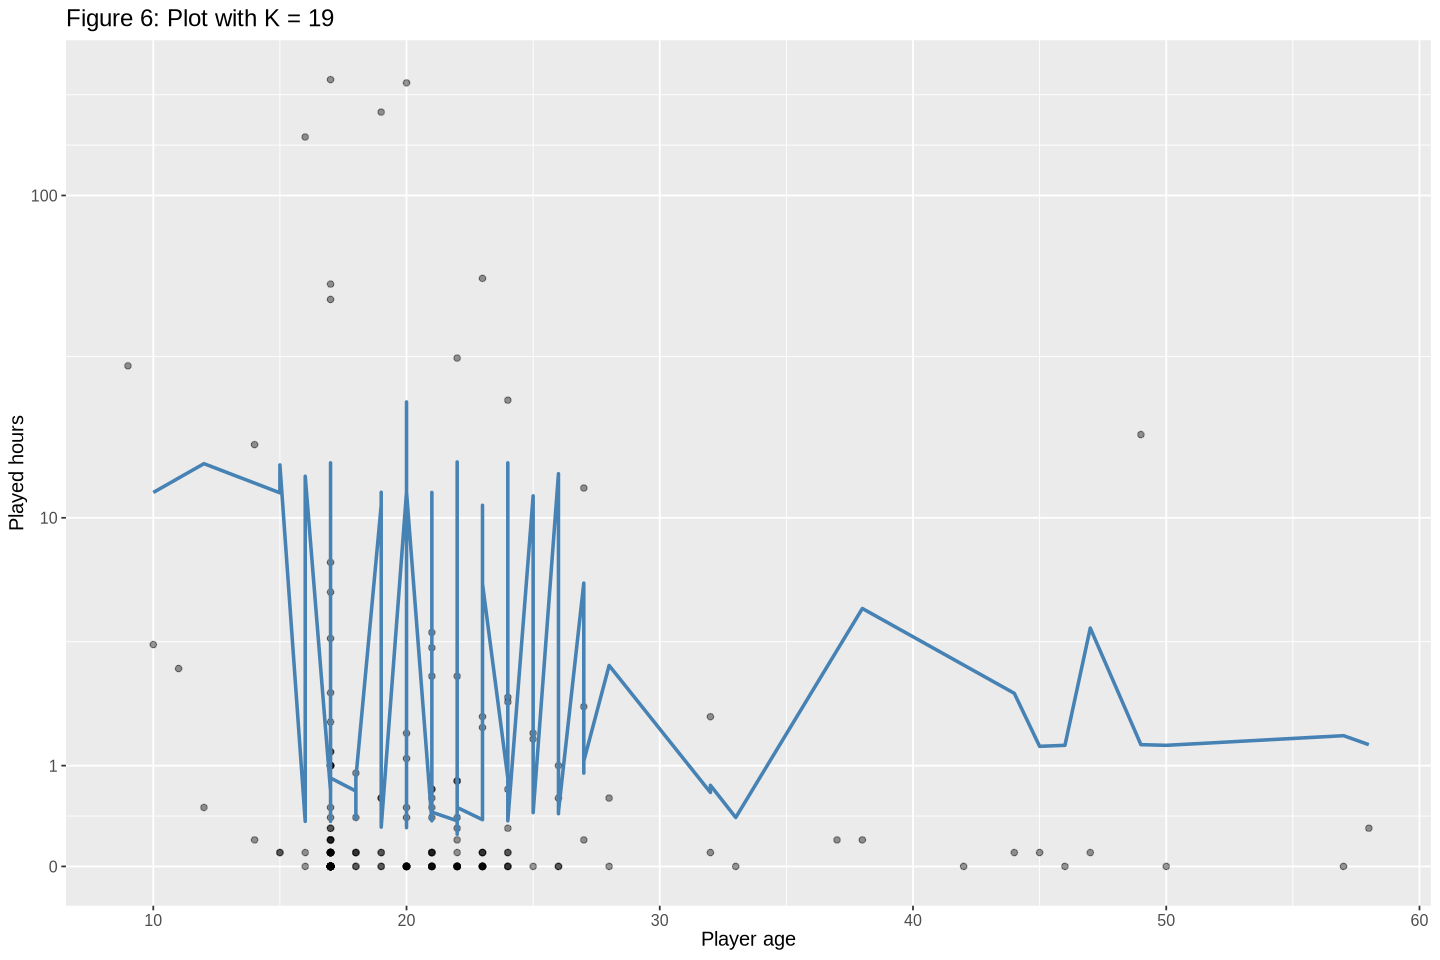

In [11]:
set.seed(2026)

# model with k=19
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("regression")

players_best_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_best_spec) |>
    fit(players_train)

players_preds <- players_best_fit |>
    predict(players_train) |>
    bind_cols(players_train) |>
    mutate(.pred = .pred+1)

# our visualization
plot_final <- ggplot(players_shifted, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
    xlab("Player age") +
    ylab("Played hours") +
    scale_y_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))+
    ggtitle("Figure 6: Plot with K = 19") +
    theme(text = element_text(size = 12))
plot_final

And finally, we gather the RMSE on testing data.

In [12]:
# RMSE on testing data
players_summary <- players_best_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric=="rmse")

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,24.04881


## Discussion:
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to
## References
references if necessary, make sure they all have a consistent citation style.